In [ ]:
# from keras import regularizers
from tensorflow.keras.models import Model

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import os
import gc

from sklearn.model_selection import train_test_split


import tensorflow as tf
from tqdm.autonotebook import tqdm

import numpy as np #
import pandas as pd

from keras import Sequential
from keras.callbacks import EarlyStopping

from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.layers import Lambda, Input, GlobalAveragePooling2D,BatchNormalization
from keras.utils import to_categorical



from keras.preprocessing.image import load_img

<ipython-input-3-a66e76d93827>:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")



GPU available (YESS!!!!)


In [ ]:
#reading labels csv file
import pandas as pd

labels = pd.read_csv('/content/drive/MyDrive/projetgod/filtered_labels.csv')
labels.head()
#print(len(labels))-->10222

id                breed
0  000bec180eb18c7604dcecc8fe0dba07          boston_bull
1  003df8b8a8b05244b1d920bb6cf451f9              basenji
2  0042188c895a2f14ef64a918ed9c7b64   scottish_deerhound
3  00693b8bc2470375cc744a6391d397ec          maltese_dog
4  00792e341f3c6eb33663e415d0715370  african_hunting_dog

In [ ]:
import pandas as pd

# Remplacez '/content/drive/MyDrive/projetgod/labels.csv' par le chemin correct de votre fichier CSV
filtered_labels=pd.read_csv('/content/drive/MyDrive/projetgod/filtered_labels.csv')

# Utiliser value_counts pour compter le nombre d'occurrences de chaque race
breed_counts1=filtered_labels['breed'].value_counts()
# Afficher chaque race et le nombre d'images associées
#for breed, count in breed_counts.items():
#    print(f"Race: {breed}, Nombre d'images: {count}")
print (breed_counts1.count())


39


In [ ]:
import pandas as pd

def get_photos_by_race(labels_path):
    # Charger le fichier labels.csv
    labels_df = pd.read_csv(labels_path)

    # Initialiser un dictionnaire pour stocker les photos par race
    photos_by_race = {}

    # Parcourir le DataFrame et remplir le dictionnaire
    for index, row in labels_df.iterrows():
        breed = row['breed']
        photo_id = row['id']

        if breed not in photos_by_race:
            photos_by_race[breed] = []

        photos_by_race[breed].append(photo_id)

    return photos_by_race

# Exemple d'utilisation
labels_path = '/content/drive/MyDrive/projetgod/filtered_labels.csv'
photos_by_race = get_photos_by_race(labels_path)

# Afficher les photos par race
for breed, photos in photos_by_race.items():
    print(f"Race : {breed}, Nombre de photos : {len(photos)}")
    print("Photos :", photos)
    print()
print(f"Nombre total de races : {len(photos_by_race)}")


Race : boston_bull, Nombre de photos : 87
Photos : ['000bec180eb18c7604dcecc8fe0dba07', '010d65bd29d246aea53d9849da142ccf', '0755a940eac9a9b8cf0328b4be062096', '07d7cfbdbd3682cae50902b53c798028', '0b3d3120a62c2bc280f589d473041d06', '10730dfd280bb4b2723dc677378f2ff1', '118060ca946af5cfd1b3bbe030f9003c', '13f939b9b15ec56409a21017263db93c', '146be641443a270dd8116f65d53d0c9d', '16aaa590e39530bc1cb319fc7d89c00e', '172fcb0b8bbd67401c9e53e5f9bf39bc', '20be3ce1dd7db9194c856726c2f154a3', '240ce7dee9610547cad87c92fcff7dbb', '251c34f3b527215f0b865a4580bf4e95', '2c5f6c1c3acef3e307fd92378caf198c', '2cddd21e49ea9246eaa8012ae03aedac', '2de8d47770da0fb805ccf8461d062c54', '2fde20eb9c645c02a583ef01ebce6374', '309bf67309851334acebe0003c21b180', '30c2c1c75e271b8baae54908bfd8e98a', '30ff784cea2bfc2a6df330f58e781b98', '33a255a956f02a591865dbe9768eff77', '346c9842d580b40bd7ca52d4095e3ea4', '36549cf287a833afff09821e55a923d8', '387ae89153da8b0171322ab0cd54923e', '3c4a342c6aca01e2a31c03b072916fbe', '44e59225be9

In [ ]:
filtered_labels.head()

print(len(filtered_labels))


Race : dandie_dinmont, Nombre de photos : 89
Photos : ['050073020e80e4935b53df8d786c8612', '08571d6bb5ecf6c9b7a145dc24043088', '0a96f376d746b191fcc6e4812a603f7f', '0d579f92d60935a54aa6dba6e6213257', '10f1d53bb20d5acc7c8772018399c238', '1416892831c073f6d3879d8cdf5386dd', '174c68c77ca368337e9fc35112d7b842', '19824021ae3bb47d0ed1069c78633c6c', '1ca968b47f96eae326ba0d7428584e6d', '1d499d102adc9f6b8b660fbe96f57d5a', '1d7e21514b5bba48a16928a3d3129fe5', '21dfcac3b5cc302372a081c0bdc7a24c', '260a6a3079eeb47413c040b4ebb4c8bf', '26cff375af0d80056c8932750f904bdd', '26fff4fd8a7265b3906507fc5f245da2', '28a28c36cb45db604d7d517f8f9600f1', '29975437f5b41ee4e061d83253f12d74', '3059a265274759f6a68a553bb3ed865f', '339c285a763d61930b7c157c58a733f3', '39669e1abaa9c72b3fea8ff81d115db9', '3b1b257e380f47c09ffc4f4aa7011a2e', '3b983d80630d25b0c303da2a511b619b', '3fe38b30abae7147cf67ce083389943e', '4001319125d18708cf2d148a43f4e968', '4787bd73d7c56305db4f23e7dddf7b96', '47d16e87d29ceec3a643f2fd58998d60', '48ea23c

In [ ]:
import os
from os.path import join, isfile

# Chemin du répertoire contenant les images
repertoire_images = '/content/drive/MyDrive/projetgod/train'

# Liste des fichiers dans le répertoire
fichiers = [f for f in os.listdir(repertoire_images) if isfile(join(repertoire_images, f))]

# Filtrer les fichiers qui sont des images (par exemple, avec une extension .jpg)
images = [f for f in fichiers if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Nombre total d'images
nombre_images = len(images)

# Afficher le nombre d'images
print(f"Le nombre total d'images dans le répertoire est : {nombre_images}")

Le nombre total d'images dans le répertoire est : 4000


In [ ]:
import os

# Remplacez '/content/drive/MyDrive/projetgod/images' par le chemin correct de votre dossier d'images
dossier_images = '/content/drive/MyDrive/projetgod/train'

# Liste des fichiers dans le dossier d'images
fichiers_images = os.listdir(dossier_images)

# Filtrer les fichiers avec l'extension .jpg
images_jpg = [fichier for fichier in fichiers_images if fichier.endswith('.jpg')]

# Afficher le nombre total d'images
nombre_images = len(images_jpg)
print(f"Le nombre total d'images dans {dossier_images} est : {nombre_images}")

Le nombre total d'images dans /content/drive/MyDrive/projetgod/train est : 4000


In [ ]:
#describe
filtered_labels.describe()

id               breed
count                               3929                3929
unique                              3929                  39
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

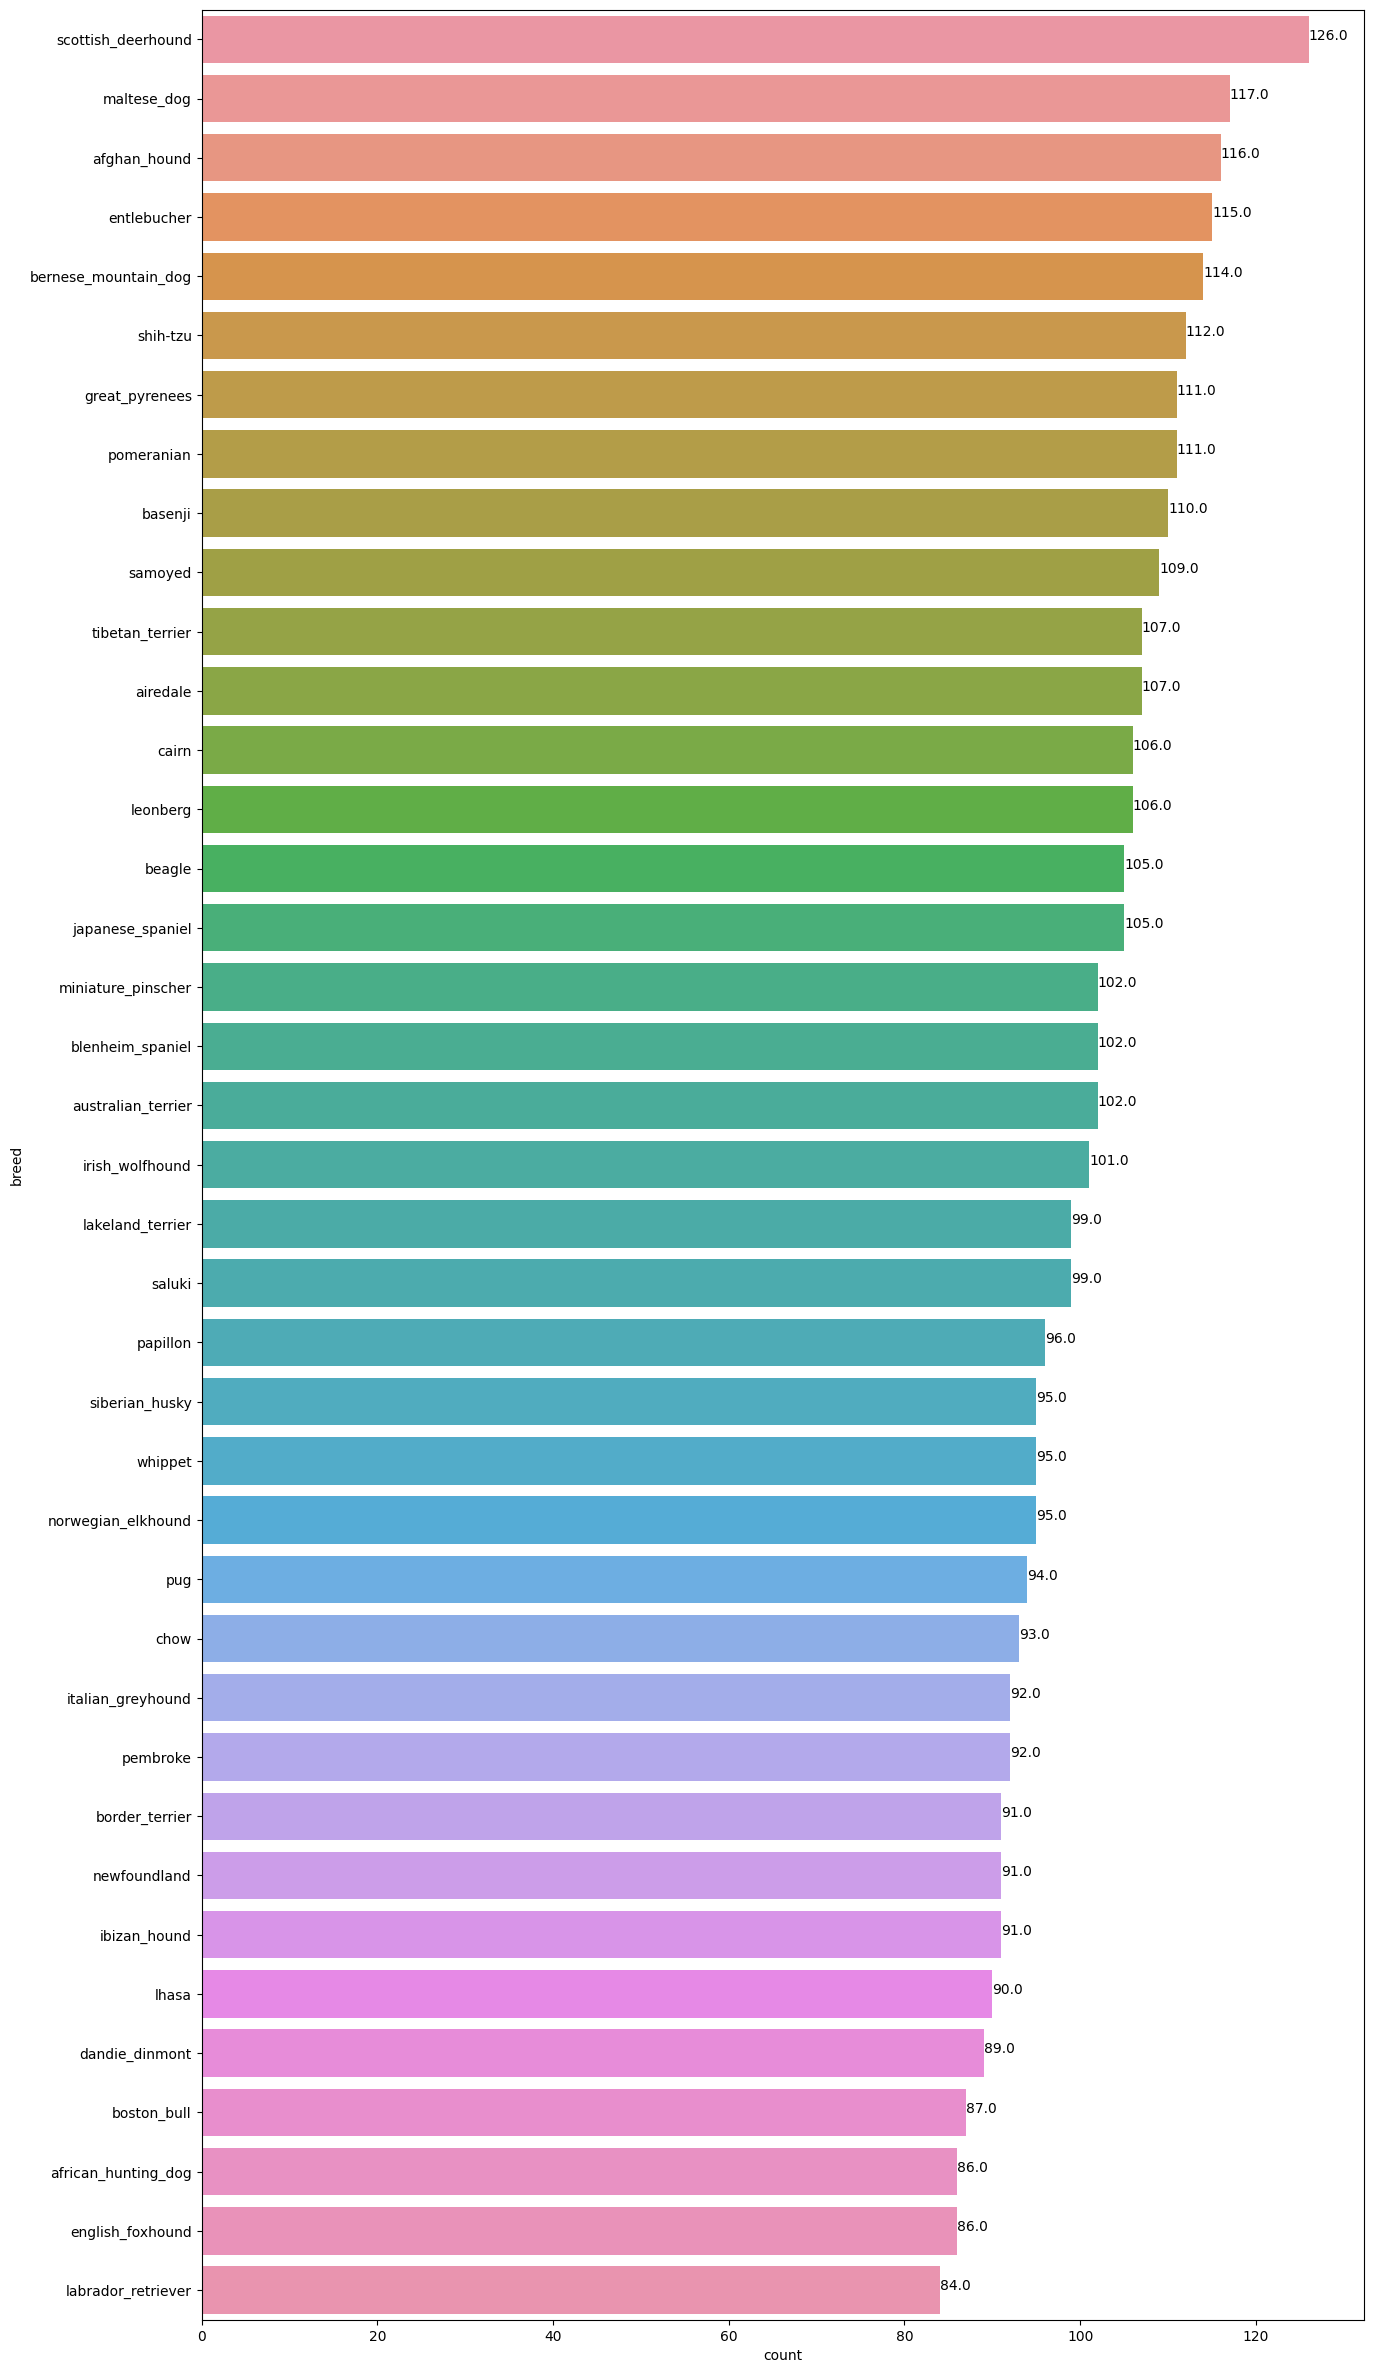

In [ ]:
#function to show bar length
def barw(ax):

    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))

#finding top dog brands

plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=filtered_labels['breed'],order=filtered_labels['breed'].value_counts().index)
barw(ax0)
plt.show()

In [ ]:
#total unique breeds
#Le résultat affichera toutes les races de chiens uniques présentes dans la colonne 'breed'

unique_breeds = filtered_labels['breed'].unique()
print(unique_breeds)
print(len(unique_breeds))#longeur de la liste unique

['boston_bull' 'basenji' 'scottish_deerhound' 'maltese_dog'
 'african_hunting_dog' 'lakeland_terrier' 'cairn' 'labrador_retriever'
 'ibizan_hound' 'border_terrier' 'tibetan_terrier' 'norwegian_elkhound'
 'shih-tzu' 'australian_terrier' 'samoyed' 'papillon' 'entlebucher'
 'saluki' 'pug' 'airedale' 'leonberg' 'bernese_mountain_dog' 'lhasa'
 'italian_greyhound' 'afghan_hound' 'miniature_pinscher' 'irish_wolfhound'
 'chow' 'english_foxhound' 'siberian_husky' 'newfoundland'
 'dandie_dinmont' 'great_pyrenees' 'beagle' 'whippet' 'japanese_spaniel'
 'pomeranian' 'pembroke' 'blenheim_spaniel']
39


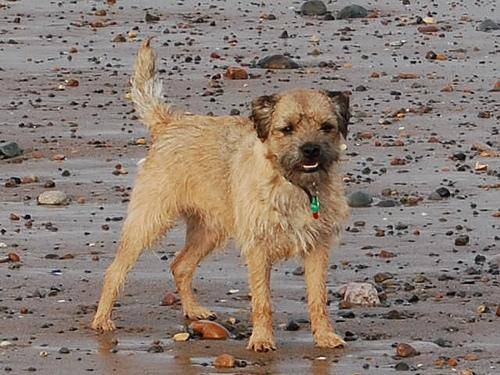

In [ ]:
# Lets check one image
from IPython.display import display, Image
Image("/content/drive/MyDrive/projetgod/train/0207803a6ce1bfad98e7f095c965e44a.jpg")

In [ ]:
import os
print('nombre images',len(os.listdir('/content/drive/MyDrive/projetgod/train')))
print('nombre id',len(filtered_labels))
if len(os.listdir('/content/drive/MyDrive/projetgod/train')) == len(filtered_labels['id']):
    print('Number of file matches number of actual images!')
else:
    print('Number of file doesnot matches number of actual images!!')


nombre images 4000
nombre id 3929
Number of file doesnot matches number of actual images!!


In [ ]:
#Create list of alphabetically sorted labels.
classes = sorted(list(set(filtered_labels['breed'])))
n_classes = len(classes)
print('Total unique breed {}'.format(n_classes))
#Map each label string to an integer label.
class_to_num = dict(zip(classes, range(n_classes)))
class_to_num
#print(class_to_num) --> affichage dans un seule ligne

Total unique breed 39


{'afghan_hound': 0,
 'african_hunting_dog': 1,
 'airedale': 2,
 'australian_terrier': 3,
 'basenji': 4,
 'beagle': 5,
 'bernese_mountain_dog': 6,
 'blenheim_spaniel': 7,
 'border_terrier': 8,
 'boston_bull': 9,
 'cairn': 10,
 'chow': 11,
 'dandie_dinmont': 12,
 'english_foxhound': 13,
 'entlebucher': 14,
 'great_pyrenees': 15,
 'ibizan_hound': 16,
 'irish_wolfhound': 17,
 'italian_greyhound': 18,
 'japanese_spaniel': 19,
 'labrador_retriever': 20,
 'lakeland_terrier': 21,
 'leonberg': 22,
 'lhasa': 23,
 'maltese_dog': 24,
 'miniature_pinscher': 25,
 'newfoundland': 26,
 'norwegian_elkhound': 27,
 'papillon': 28,
 'pembroke': 29,
 'pomeranian': 30,
 'pug': 31,
 'saluki': 32,
 'samoyed': 33,
 'scottish_deerhound': 34,
 'shih-tzu': 35,
 'siberian_husky': 36,
 'tibetan_terrier': 37,
 'whippet': 38}

In [ ]:
input_shape = (331,331,3)


def images_to_array(directory, label_dataframe, target_size = input_shape):

    image_labels = label_dataframe['breed']
    images = np.zeros([len(label_dataframe), target_size[0], target_size[1], target_size[2]],dtype=np.uint8) #as we have huge data and limited ram memory. uint8 takes less memory
    y = np.zeros([len(label_dataframe),1],dtype = np.uint8)

    for ix, image_name in enumerate(tqdm(label_dataframe['id'].values)):
        img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = target_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img

        dog_breed = image_labels[ix]
        y[ix] = class_to_num[dog_breed]

    y = to_categorical(y)

    return images,y

In [ ]:
import time
t = time.time()

X,y = images_to_array('/content/drive/MyDrive/projetgod/train', filtered_labels[:])

print('runtime in seconds: {}'.format(time.time() - t))

  0%|          | 0/3929 [00:00<?, ?it/s]

runtime in seconds: 82.42246723175049


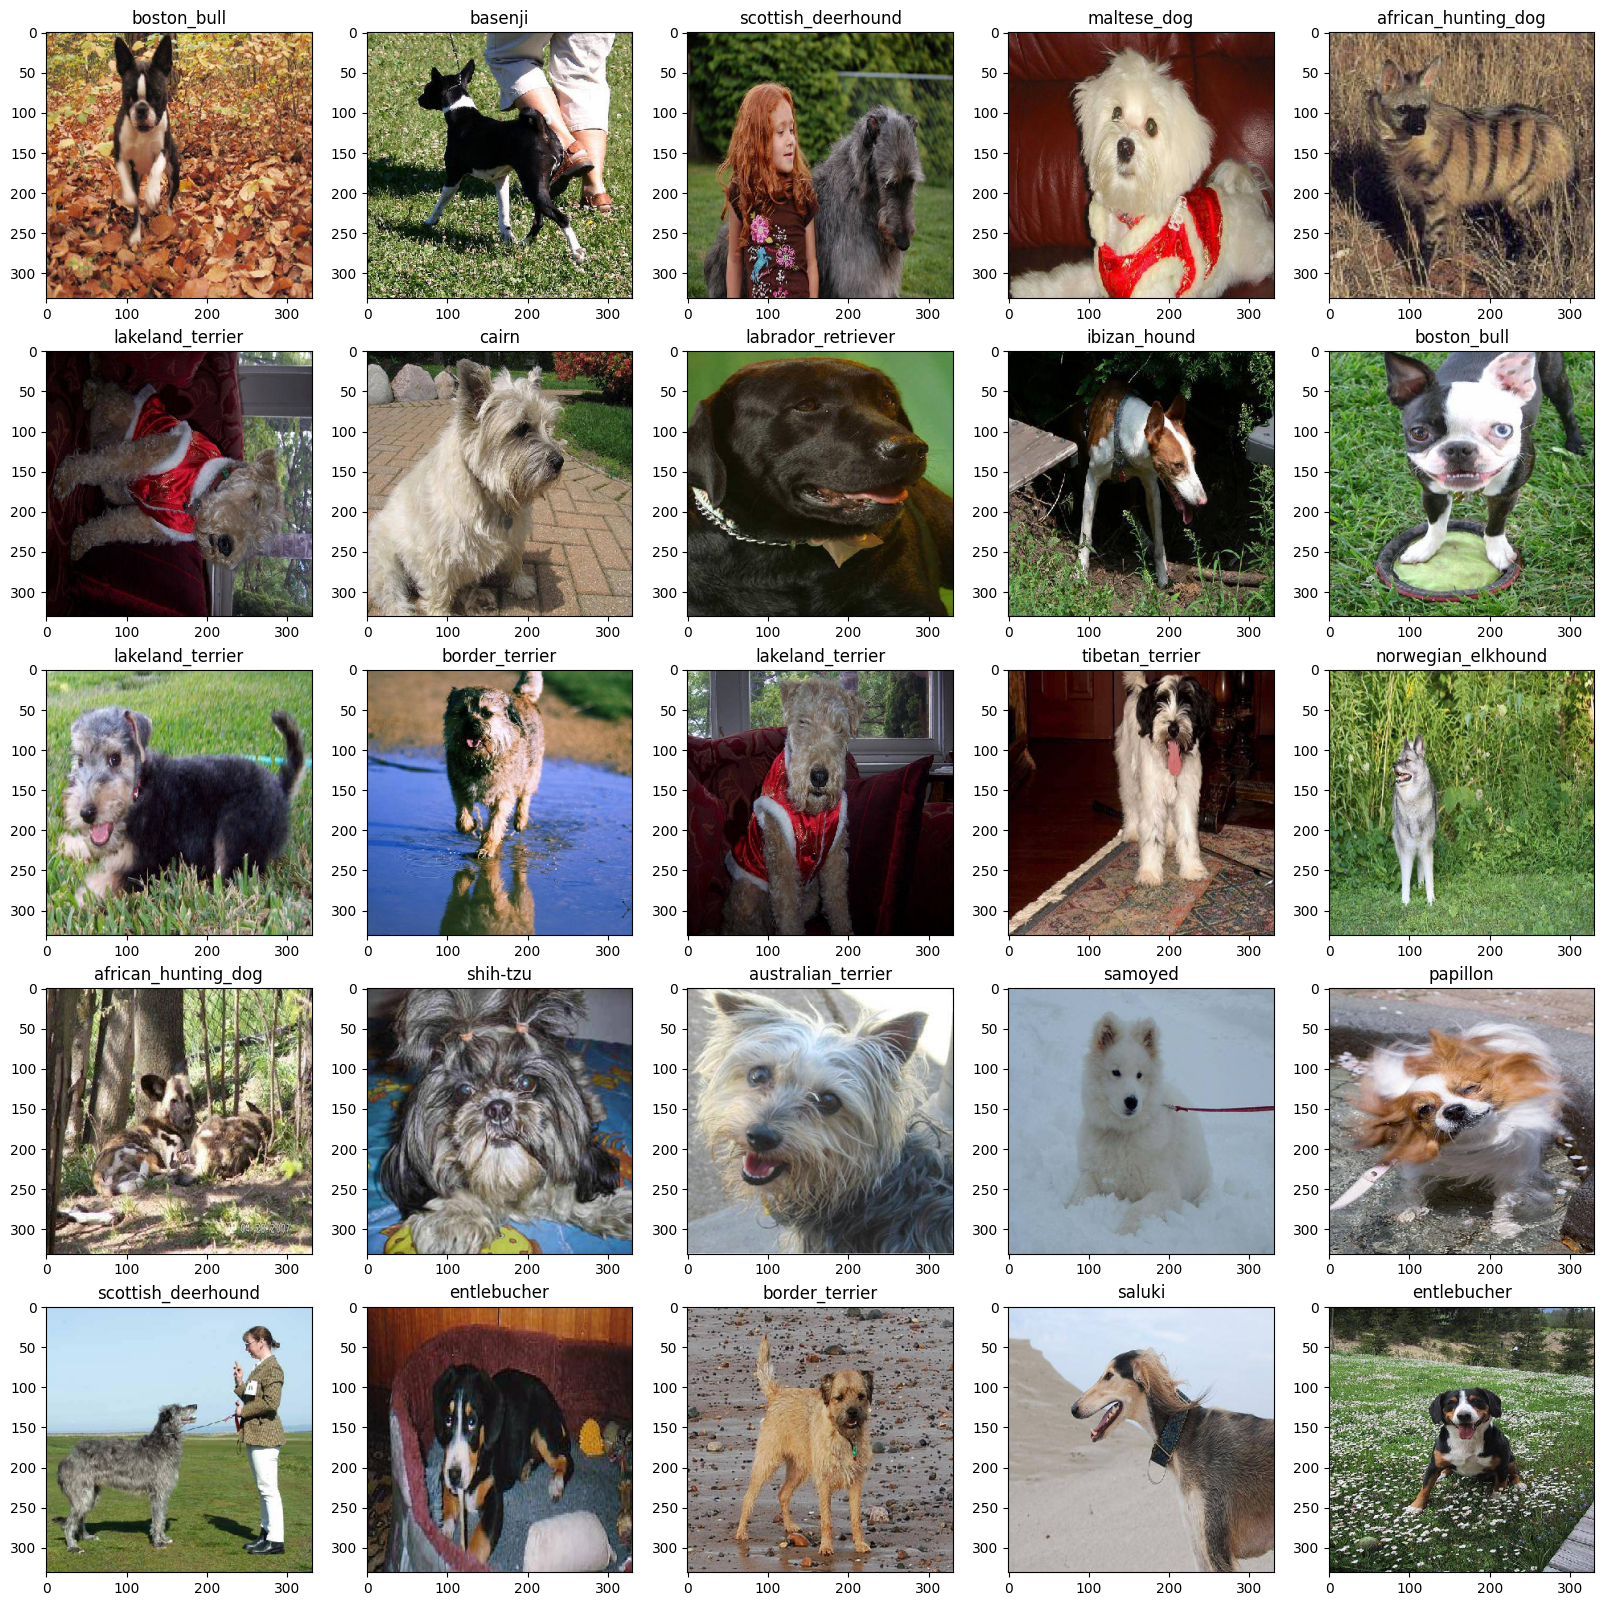

In [ ]:
# np.where(y[5]==1)[0][0]

# lets check some dogs and their breeds
n=25

# setup the figure
plt.figure(figsize=(20,20))

for i in range(n):
#     print(i)
    ax = plt.subplot(5, 5, i+1)
    plt.title(classes[np.where(y[i] ==1)[0][0]])
    plt.imshow(X[i].astype('int32')) # .astype('int32') ---> as imshow() needs integer data to read the image


In [ ]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5,verbose = 1)

#Prepare call backs
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# Hyperparameters
batch_size= 128
epochs=50
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None,  amsgrad=False)


In [ ]:
#function to extract features from the dataset by a given pretrained model
img_size = (331,331,3)

def get_features(model_name, model_preprocessor, input_size, data):

    input_layer = Input(input_size)
    preprocessor = Lambda(model_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)

    #Extract feature.
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps

In [ ]:
#Extract features using InceptionV3
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input
inception_features = get_features(InceptionV3,
                                  inception_preprocessor,
                                  img_size, X)

123/123 [==============================] - 28s 147ms/step
Feature maps shape:  (3929, 2048)


In [ ]:
# Extract features using Xception
from keras.applications.xception import Xception, preprocess_input
xception_preprocessor = preprocess_input
xception_features = get_features(Xception,
                                 xception_preprocessor,
                                 img_size, X)

In [ ]:
# Extract features using InceptionResNetV2
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
inc_resnet_preprocessor = preprocess_input
inc_resnet_features = get_features(InceptionResNetV2,
                                   inc_resnet_preprocessor,
                                   img_size, X)

In [ ]:
# Extract features using NASNetLarge
from keras.applications.nasnet import NASNetLarge, preprocess_input
nasnet_preprocessor = preprocess_input
nasnet_features = get_features(NASNetLarge,
                               nasnet_preprocessor,
                               img_size, X)

In [ ]:
del X #to free up some ram memory
gc.collect()

In [ ]:
#Creating final featuremap by combining all extracted features

final_features = np.concatenate([inception_features,
                                 xception_features,
                                 nasnet_features,
                                 inc_resnet_features,], axis=-1) #axis=-1 to concatinate horizontally

print('Final feature maps shape', final_features.shape)

In [ ]:
#Prepare Deep net

model = Sequential()
model.add(Dense(1028,input_shape=(final_features.shape[1],)))
model.add(Dropout(0.7,input_shape=(final_features.shape[1],)))
model.add(Dense(n_classes,activation= 'softmax'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(momentum=0.9),
                           loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#Training the model.
history = model.fit(final_features, y,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.2,
            callbacks=[lrr,EarlyStop])

In [ ]:
model.save('dog_breed_classifier.pkl')

In [ ]:
#deleting to free up ram memory

del inception_features
del xception_features
del nasnet_features
del inc_resnet_features
del final_features
gc.collect()
model.save('dog_breed_classifier.h5')

In [ ]:
#Function to read images from test directory

def images_to_array_test(test_path, img_size = (331,331,3)):
    test_filenames = [test_path + fname for fname in os.listdir(test_path)]

    data_size = len(test_filenames)
    images = np.zeros([data_size, img_size[0], img_size[1], 3], dtype=np.uint8)


    for ix,img_dir in enumerate(tqdm(test_filenames)):
#         img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = img_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img
    print('Ouptut Data Size: ', images.shape)
    return images

test_data = images_to_array_test('/content/drive/MyDrive/projetgod/test/', img_size)

In [ ]:
#Extract test data features.
def extact_features(data):
    inception_features = get_features(InceptionV3, inception_preprocessor, img_size, data)
    xception_features = get_features(Xception, xception_preprocessor, img_size, data)
    nasnet_features = get_features(NASNetLarge, nasnet_preprocessor, img_size, data)
    inc_resnet_features = get_features(InceptionResNetV2, inc_resnet_preprocessor, img_size, data)

    final_features = np.concatenate([inception_features,
                                     xception_features,
                                     nasnet_features,
                                     inc_resnet_features],axis=-1)

    print('Final feature maps shape', final_features.shape)

    #deleting to free up ram memory
    del inception_features
    del xception_features
    del nasnet_features
    del inc_resnet_features
    gc.collect()


    return final_features

test_features = extact_features(test_data)

In [ ]:
#Free up some space.
del test_data
gc.collect()

In [ ]:
#Predict test labels given test data features.

pred = model.predict(test_features)

In [ ]:
# First prediction
print(pred[0])
print(f"Max value (probability of prediction): {np.max(pred[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(pred[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(pred[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {classes[np.argmax(pred[0])]}")

In [ ]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(classes))
preds_df.head()

In [ ]:
# Append test image ID's to predictions DataFrame
test_path = "/content/drive/MyDrive/projetgod/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

In [ ]:
preds_df.loc[:,list(classes)]= pred

preds_df.to_csv('submission.csv',index=None)
preds_df.head()

In [ ]:
#reading the image and converting it into an np array

img_g = load_img('/content/drive/MyDrive/projetgod/test/403415180_368064968948102_5860267660421361177_n.jpg',target_size = img_size)
img_g = np.expand_dims(img_g, axis=0) # as we trained our model in (row, img_height, img_width, img_rgb) format, np.expand_dims convert the image into this format
# img_g

In [ ]:
img_g.shape

In [ ]:
# #Predict test labels given test data features.
test_features = extact_features(img_g)
predg = model.predict(test_features)
print(f"Predicted label: {classes[np.argmax(predg[0])]}")
print(f"Probability of prediction): {round(np.max(predg[0])) * 100} %")